In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
golf_dict = {"ceu":["nuvem","nuvem","sol","chuva","sol","sol"],
              "temperatura":[83,94,70,68,85,80],
              "umidade":[86,65,90,75,None,90],
              "vento":[None,True,False,False,False,True],
              "joga":["sim","sim","sim","sim","nao","nao"]}
df = pd.DataFrame(golf_dict)
df

,ceu,temperatura,umidade,vento,joga
0,nuvem,83,86.0,None,sim
1,nuvem,94,65.0,True,sim
2,sol,70,90.0,False,sim
3,chuva,68,75.0,False,sim
4,sol,85,NaN,False,nao
5,sol,80,90.0,True,nao


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ceu          6 non-null      object 
 1   temperatura  6 non-null      int64  
 2   umidade      5 non-null      float64
 3   vento        5 non-null      object 
 4   joga         6 non-null      object 
dtypes: float64(1), int64(1), object(3)
memory usage: 368.0+ bytes


In [ ]:
# calculando a umidade média
umidade_media = df['umidade'].mean()
# preenchendo umidade faltante com a média
df['umidade'].fillna(umidade_media, inplace=True)

In [ ]:
# calculando a moda do vento
vento_moda = df['vento'].mode()
# preenchendo vento faltante com a moda
df['vento'].fillna(vento_moda, inplace=True)

In [ ]:
df

,ceu,temperatura,umidade,vento,joga
0,nuvem,83,86.0,False,sim
1,nuvem,94,65.0,True,sim
2,sol,70,90.0,False,sim
3,chuva,68,75.0,False,sim
4,sol,85,81.2,False,nao
5,sol,80,90.0,True,nao


In [ ]:
# transformando True em 1 e False em 0
df['vento'] = df['vento'].map({True: 1, False: 0})

In [ ]:
# transformando 'sim' em 1 e 'nao' em 0
df['joga'] = df['joga'].map({'sim': 1, 'nao': 0})

In [ ]:
# criando coluna chuva
df['chuva'] = df['ceu'].map(lambda x: 1 if x == 'chuva' else 0)

In [ ]:
# criando coluna sol
df['sol'] = df['ceu'].map(lambda x: 1 if x == 'sol' else 0)

In [ ]:
df

,ceu,temperatura,umidade,vento,joga,chuva,sol
0,nuvem,83,86.0,0,1,0,0
1,nuvem,94,65.0,1,1,0,0
2,sol,70,90.0,0,1,0,1
3,chuva,68,75.0,0,1,1,0
4,sol,85,81.2,0,0,0,1
5,sol,80,90.0,1,0,0,1


In [ ]:
# removendo a coluna ceu
df.drop('ceu', axis=1, inplace=True)

In [ ]:
df

,temperatura,umidade,vento,joga,chuva,sol
0,83,86.0,0,1,0,0
1,94,65.0,1,1,0,0
2,70,90.0,0,1,0,1
3,68,75.0,0,1,1,0
4,85,81.2,0,0,0,1
5,80,90.0,1,0,0,1


In [ ]:
# inserindo nova linha com os valores 72, 89, 1, 0, 1, 0
df = df.append(pd.Series([72,89,1,0,1,0], index=df.columns), ignore_index=True)

In [ ]:
# inserindo 2 novas linhas na tabela
novas_linhas = pd.DataFrame(
    np.array([
        [84,89,1,0,1,0],
        [91,17,0,1,0,0]
     ]), columns=df.columns,)
df = df.append(novas_linhas, ignore_index=True)

In [ ]:
df

,temperatura,umidade,vento,joga,chuva,sol
0,83,86.0,0,1,0,0
1,94,65.0,1,1,0,0
2,70,90.0,0,1,0,1
3,68,75.0,0,1,1,0
4,85,81.2,0,0,0,1
5,80,90.0,1,0,0,1
6,72,89.0,1,0,1,0
7,84,89.0,1,0,1,0
8,91,17.0,0,1,0,0


In [ ]:
# removendo as linhas 2, 5, 7 e 8
df.drop([2,5,7,8], axis=0, inplace=True)

In [ ]:
df

,temperatura,umidade,vento,joga,chuva,sol
0,83,86.0,0,1,0,0
1,94,65.0,1,1,0,0
3,68,75.0,0,1,1,0
4,85,81.2,0,0,0,1
6,72,89.0,1,0,1,0


In [ ]:
# resetando os índices
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df

,temperatura,umidade,vento,joga,chuva,sol
0,83,86.0,0,1,0,0
1,94,65.0,1,1,0,0
2,68,75.0,0,1,1,0
3,85,81.2,0,0,0,1
4,72,89.0,1,0,1,0


In [ ]:
# reordenando colunas
df = df[['chuva', 'sol', 'temperatura', 'umidade','vento','joga']]
df

,chuva,sol,temperatura,umidade,vento,joga
0,0,0,83,86.0,0,1
1,0,0,94,65.0,1,1
2,1,0,68,75.0,0,1
3,0,1,85,81.2,0,0
4,1,0,72,89.0,1,0


In [ ]:
# função para normalizar temperatura
def normalize_temperatura(entrada):
  temp_min = df['temperatura'].min()
  temp_max = df['temperatura'].max()

  return (entrada - temp_min) / (temp_max - temp_min)

In [ ]:
# normalizando temperatura
df['temperatura'] = df['temperatura'].map(normalize_temperatura)
df

,chuva,sol,temperatura,umidade,vento,joga
0,0,0,0.576923,86.0,0,1
1,0,0,1.000000,65.0,1,1
2,1,0,0.000000,75.0,0,1
3,0,1,0.653846,81.2,0,0
4,1,0,0.153846,89.0,1,0


In [ ]:
# função para normalizar umidade
def normalize_umidade(entrada):
  umid_min = df['umidade'].min()
  umid_max = df['umidade'].max()

  return (entrada - umid_min) / (umid_max - umid_min)

# normalizando umidade
df['umidade'] = df['umidade'].map(normalize_umidade)
df

,chuva,sol,temperatura,umidade,vento,joga
0,0,0,0.576923,0.875000,0,1
1,0,0,1.000000,0.000000,1,1
2,1,0,0.000000,0.416667,0,1
3,0,1,0.653846,0.675000,0,0
4,1,0,0.153846,1.000000,1,0


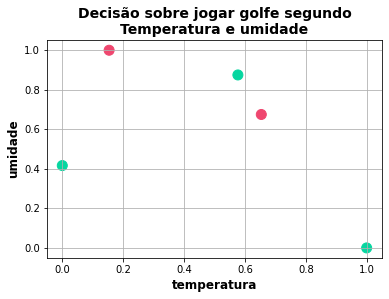

In [ ]:
x = df['temperatura']                                   # eixo x
y = df['umidade']                                       # eixo y
plt.scatter(x, y,                                       # gráfico
    color= df['joga'].map({1: '#06D6A0', 0: '#EF476F'}) ,s=100)
plt.title(                                              # título
    "Decisão sobre jogar golfe segundo\nTemperatura e umidade",
    fontsize=14, fontweight='bold')
plt.xlabel("temperatura",fontsize=12,fontweight='bold') # rótulo x
plt.ylabel("umidade",fontsize=12,fontweight='bold')     # rótulo y
plt.grid('on')                                          # grades
plt.show()

In [ ]:
# função para girar (anti-horário)
def girar_45_graus(x, y):
  x_girado = np.cos(np.pi/4) * x + np.sin(np.pi/4) * y
  y_girado = -np.sin(np.pi/4) * y + np.cos(np.pi/4) * x

  return x_girado, y_girado

In [ ]:
df['temperaturaG'] = df.apply(
    lambda col: girar_45_graus(col['temperatura'], col['umidade'])[0], axis = 1)
df['umidadeG'] = df.apply(
    lambda col: girar_45_graus(col['temperatura'], col['umidade'])[1], axis = 1)
df

,chuva,sol,temperatura,umidade,vento,joga,temperaturaG,umidadeG
0,0,0,0.576923,0.875000,0,1,1.026665,-0.210772
1,0,0,1.000000,0.000000,1,1,0.707107,0.707107
2,1,0,0.000000,0.416667,0,1,0.294628,-0.294628
3,0,1,0.653846,0.675000,0,0,0.939636,-0.014958
4,1,0,0.153846,1.000000,1,0,0.815892,-0.598321


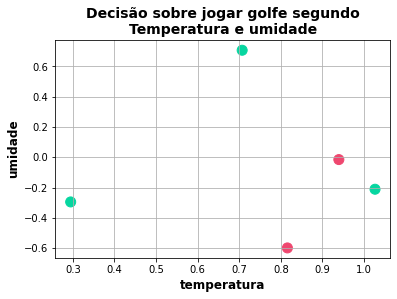

In [ ]:
x = df['temperaturaG']                                   # eixo x
y = df['umidadeG']                                       # eixo y
plt.scatter(x, y,                                       # gráfico
    color= df['joga'].map({1: '#06D6A0', 0: '#EF476F'}) ,s=100)
plt.title(                                              # título
    "Decisão sobre jogar golfe segundo\nTemperatura e umidade",
    fontsize=14, fontweight='bold')
plt.xlabel("temperatura",fontsize=12,fontweight='bold') # rótulo x
plt.ylabel("umidade",fontsize=12,fontweight='bold')     # rótulo y
plt.grid('on')                                          # grades
plt.show()